In [ ]:
! pip install numpy
! pip install Cython
! pip install scikit-multiflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.6/450.6 kB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-multiflow: filename=scikit_multiflow-0.5.3-cp310-cp310-linux_x86_64.whl size=1281820 sha256=90d199018b5c6e7206ad8ce97f31ff2cbde0c7ec1b5e6bd3b559abd29218e9eb
  Stored in directory: /root/.cache/pip/wheels/6e/1b/56/45b17a6cf203d98000a45976cb0dd0c4c3f11960e6a505f231
Successfully built scikit-multiflow


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("darkgrid")


from skmultiflow.data import DataStream
from skmultiflow.meta import AdaptiveRandomForestClassifier

In [ ]:
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix,accuracy_score

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.reshape(x_train,(-1,28*28))/255
x_test = np.reshape(x_test,(-1,28*28))/255

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
from keras.utils.data_utils import next_sample
Count = 20000
DataSetStream = DataStream(x_train[10:Count+10],y_train[10:Count+10],n_targets=10)

Rate100Plot = []
RateSinglePlot = []
RateSingle = 0
Rate100Temp = 0

classifier = AdaptiveRandomForestClassifier(n_estimators=15)
index = 0


while DataSetStream.has_more_samples():
    index += 1
    x,y = DataSetStream.next_sample()
    y_pred = classifier.predict(x)

    if np.equal(y_pred,y):
        RateSingle += 1
        Rate100Temp += 1

    if index%100 == 0:
        Rate100Plot.append(Rate100Temp/100)
        Rate100Temp = 0
        print("Passed:",str(round(100*round(index/Count,4),2))+"%")

    RateSinglePlot.append(RateSingle/index)
    classifier.partial_fit(x,y)


Passed: 0.5%
Passed: 1.0%
Passed: 1.5%
Passed: 2.0%
Passed: 2.5%
Passed: 3.0%
Passed: 3.5%
Passed: 4.0%
Passed: 4.5%
Passed: 5.0%
Passed: 5.5%
Passed: 6.0%
Passed: 6.5%
Passed: 7.0%
Passed: 7.5%
Passed: 8.0%
Passed: 8.5%
Passed: 9.0%
Passed: 9.5%
Passed: 10.0%
Passed: 10.5%
Passed: 11.0%
Passed: 11.5%
Passed: 12.0%
Passed: 12.5%
Passed: 13.0%
Passed: 13.5%
Passed: 14.0%
Passed: 14.5%
Passed: 15.0%
Passed: 15.5%
Passed: 16.0%
Passed: 16.5%
Passed: 17.0%
Passed: 17.5%
Passed: 18.0%
Passed: 18.5%
Passed: 19.0%
Passed: 19.5%
Passed: 20.0%
Passed: 20.5%
Passed: 21.0%
Passed: 21.5%
Passed: 22.0%
Passed: 22.5%
Passed: 23.0%
Passed: 23.5%
Passed: 24.0%
Passed: 24.5%
Passed: 25.0%
Passed: 25.5%
Passed: 26.0%
Passed: 26.5%
Passed: 27.0%
Passed: 27.5%
Passed: 28.0%
Passed: 28.5%
Passed: 29.0%
Passed: 29.5%
Passed: 30.0%
Passed: 30.5%
Passed: 31.0%
Passed: 31.5%
Passed: 32.0%
Passed: 32.5%
Passed: 33.0%
Passed: 33.5%
Passed: 34.0%
Passed: 34.5%
Passed: 35.0%
Passed: 35.5%
Passed: 36.0%
Passed: 36.

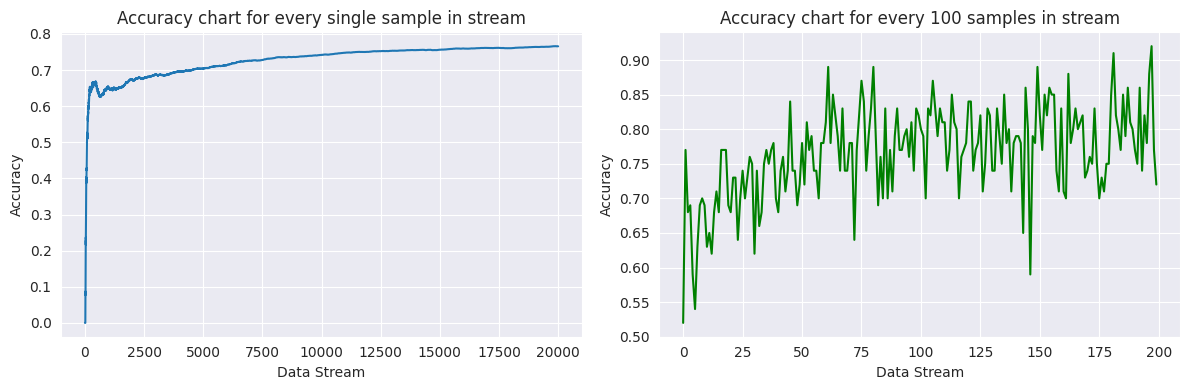

In [ ]:
plt.rcParams["figure.figsize"] = (12, 4)

plt.subplot(1,2,1)
plt.plot(RateSinglePlot)
plt.ylabel("Accuracy")
plt.xlabel("Data Stream")
plt.title("Accuracy chart for every single sample in stream")

plt.subplot(1,2,2)
plt.plot(Rate100Plot,color="green")
plt.ylabel("Accuracy")
plt.xlabel("Data Stream")
plt.title("Accuracy chart for every 100 samples in stream")

plt.tight_layout()
plt.show()


In [ ]:
y_pred_test = classifier.predict(x_test)


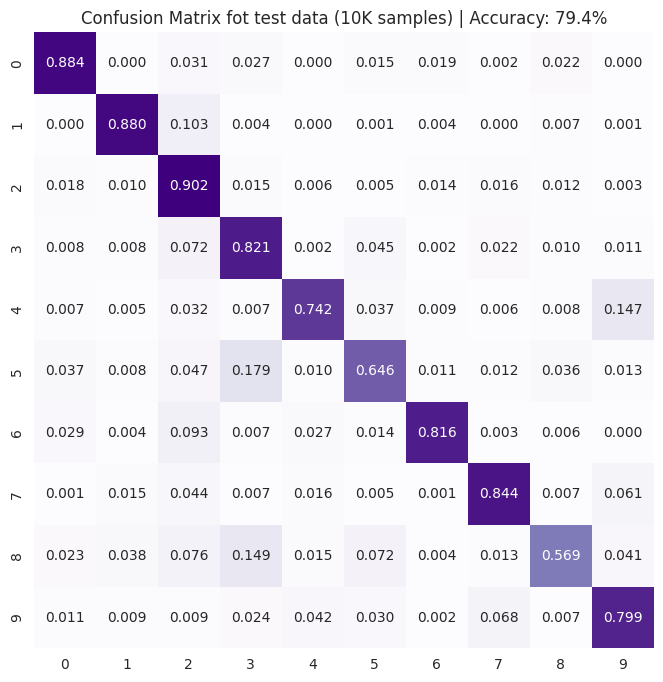

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
plt.rcParams["figure.figsize"] = (8, 8)
acc = round(100*accuracy_score(y_test,y_pred_test),2)
cm = confusion_matrix(y_test,y_pred_test,normalize='true')
sns.heatmap(cm,annot=True,cbar=False,cmap="Purples",fmt=".3f")
plt.title("Confusion Matrix fot test data (10K samples) | Accuracy: {0}%".format(acc))
plt.show()